In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn.functional as F

# fPath = "C:\\Users\\giuse\\Downloads\\monk\\"
nameTrain = "monks-3.train"
nameTest = "monks-3.test"
test = pd.read_csv(nameTest, sep="\s+", header=None)
train = pd.read_csv(nameTrain, sep="\s+", header=None)

scaler = StandardScaler()
scaler = scaler.fit(train.iloc[:, 1:-1])
trasfTrain = scaler.transform(train.iloc[:, 1:-1])
trasfTest = scaler.transform(test.iloc[:, 1:-1])

trasfTest = torch.tensor(trasfTest, dtype=torch.float32)
trasfTrain = torch.tensor(trasfTrain, dtype=torch.float32)

Y = train.iloc[:, 0]
X = trasfTrain[:, 1:-1]
xTest = trasfTest[:, 1:-1]


Primo modello di regressione logistica: lbfgs


In [7]:
logistic = lm.LogisticRegression(solver="lbfgs", verbose=0)
logisticCV = lm.LogisticRegressionCV(cv=50, solver="lbfgs", verbose=0)
logistic.fit(X, Y)
logisticCV.fit(X, Y)

logistic.predict(xTest)
logisticCV.predict(xTest)
loss = log_loss(test.iloc[:, 0], logistic.predict_proba(xTest))
lossCV = log_loss(test.iloc[:, 0], logisticCV.predict_proba(xTest))
score = logistic.score(xTest, test.iloc[:, 0])
scoreCV = logisticCV.score(xTest, test.iloc[:, 0])
print(f"lbfgs \nscore: {score} \t loss: {loss}")
print(f"scoreCV: {scoreCV} \t lossCV: {lossCV}")


score: 0.8333333333333334 	 loss: 0.3933618808189197
scoreCV: 0.8888888888888888 	 lossCV: 0.628258409549887


Secondo modello di regressione logistica: lilblinear

In [8]:
logistic2 = lm.LogisticRegression(solver="liblinear", verbose=0)
logisticCV2 = lm.LogisticRegressionCV(cv=50, solver="liblinear", verbose=0)
logistic2.fit(X, Y)
logisticCV2.fit(X, Y)

logistic2.predict(xTest)
logisticCV2.predict(xTest)
loss2 = log_loss(test.iloc[:, 0], logistic2.predict_proba(xTest))
lossCV2 = log_loss(test.iloc[:, 0], logisticCV2.predict_proba(xTest))
score2 = logistic2.score(xTest, test.iloc[:, 0])
scoreCV2 = logisticCV2.score(xTest, test.iloc[:, 0])
print(f"liblinear \nscore: {score2} \t loss: {loss2}")
print(f"scoreCV: {scoreCV2} \t lossCV: {lossCV2}")

liblinear 
score: 0.8194444444444444 	 loss: 0.39326514104649124
scoreCV: 0.8194444444444444 	 lossCV: 0.3892068706309421


Terzo modello di regressione logistica: newton-cholesky

In [ ]:
logistic3 = lm.LogisticRegression(solver="newton-cholesky", verbose=0)
logisticCV3 = lm.LogisticRegressionCV(cv=50, solver="newton-cholesky", verbose=0)
logistic3.fit(X, Y)
logisticCV2.fit(X, Y)

logistic3.predict(xTest)
logisticCV3.predict(xTest)
loss3 = log_loss(test.iloc[:, 0], logistic3.predict_proba(xTest))
lossCV3 = log_loss(test.iloc[:, 0], logisticCV3.predict_proba(xTest))
score3 = logistic3.score(xTest, test.iloc[:, 0])
scoreCV3 = logisticCV3.score(xTest, test.iloc[:, 0])
print(f"newton-cholesky \nscore: {score3} \t loss: {loss3}")
print(f"scoreCV: {scoreCV3} \t lossCV: {lossCV3}")

0.8333333333333334
0.7777777777777778


Quarto modello di regressione logistica: saga

In [ ]:
logistic4 = lm.LogisticRegression(solver="sag", verbose=0)
logisticCV4 = lm.LogisticRegressionCV(cv=50, solver="sag", verbose=0)
logistic4.fit(X, Y)
logisticCV4.fit(X, Y)

logistic4.predict(xTest)
logisticCV4.predict(xTest)
loss4 = log_loss(test.iloc[:, 0], logistic4.predict_proba(xTest))
lossCV4 = log_loss(test.iloc[:, 0], logisticCV4.predict_proba(xTest))
score4 = logistic4.score(xTest, test.iloc[:, 0])
scoreCV4 = logisticCV4.score(xTest, test.iloc[:, 0])
print(f"sag \nscore: {score4} \t loss: {loss4}")
print(f"scoreCV: {scoreCV4} \t lossCV: {lossCV4}")

0.8333333333333334
0.7777777777777778


Epoch: 1, Loss: 0.7608, Accuracy: 42.13%
Epoch: 2, Loss: 0.7536, Accuracy: 42.82%
Epoch: 3, Loss: 0.7502, Accuracy: 43.06%
Epoch: 4, Loss: 0.7476, Accuracy: 44.21%
Epoch: 5, Loss: 0.7401, Accuracy: 44.91%
Epoch: 6, Loss: 0.7339, Accuracy: 44.68%
Epoch: 7, Loss: 0.7283, Accuracy: 45.37%
Epoch: 8, Loss: 0.7204, Accuracy: 46.06%
Epoch: 9, Loss: 0.7189, Accuracy: 46.76%
Epoch: 10, Loss: 0.7135, Accuracy: 47.69%
Epoch: 11, Loss: 0.7078, Accuracy: 47.69%
Epoch: 12, Loss: 0.7044, Accuracy: 47.92%
Epoch: 13, Loss: 0.6999, Accuracy: 48.61%
Epoch: 14, Loss: 0.6952, Accuracy: 49.54%
Epoch: 15, Loss: 0.6886, Accuracy: 50.46%
Epoch: 16, Loss: 0.6820, Accuracy: 51.39%
Epoch: 17, Loss: 0.6805, Accuracy: 51.85%
Epoch: 18, Loss: 0.6757, Accuracy: 52.31%
Epoch: 19, Loss: 0.6719, Accuracy: 53.01%
Epoch: 20, Loss: 0.6650, Accuracy: 53.24%
Epoch: 21, Loss: 0.6644, Accuracy: 54.40%
Epoch: 22, Loss: 0.6626, Accuracy: 54.63%
Epoch: 23, Loss: 0.6546, Accuracy: 55.56%
Epoch: 24, Loss: 0.6520, Accuracy: 56.02%
E

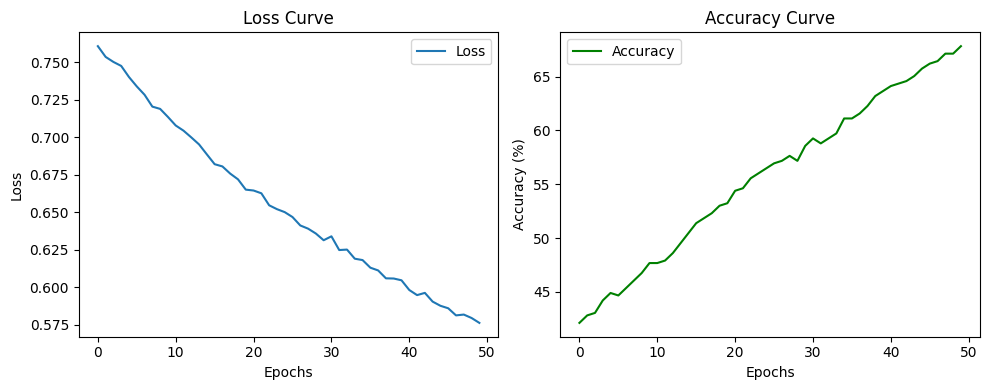

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Definire il modello di regressione logistica
class LogisticRegression(nn.Module):
    def __init__(self, n_inputs):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)  # 1 output per classificazione binaria

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoide per classificazione binaria

# Preparazione dei dati
train_labels = torch.tensor(train.iloc[:, 0].values, dtype=torch.float32).unsqueeze(1)  # Aggiungi una dimensione
test_labels = torch.tensor(test.iloc[:, 0].values, dtype=torch.float32).unsqueeze(1)

# Crea dataset e DataLoader
train_dataset = TensorDataset(trasfTrain, train_labels)
test_dataset = TensorDataset(trasfTest, test_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Inizializza il modello, la funzione di perdita e l'ottimizzatore
n_inputs = trasfTrain.shape[1]  # Numero di caratteristiche
model = LogisticRegression(n_inputs)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Allenamento del modello
epochs = 50
Loss = []
acc = []

for epoch in range(epochs):
    epoch_loss = 0.0
    model.train()
    for x, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    Loss.append(epoch_loss / len(train_loader))

    # Calcola l'accuratezza sul test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, labels in test_loader:
            outputs = model(x)
            predictions = (outputs >= 0.5).float()  # Soglia per classificazione binaria
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    acc.append(accuracy)
    print(f'Epoch: {epoch+1}, Loss: {Loss[-1]:.4f}, Accuracy: {accuracy:.2f}%')

# Grafici della perdita e dell'accuratezza
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(Loss, label='Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Accuracy', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()